# Online Retail Customer Analysis

## Objective
Analyze **customer purchasing behavior** using transactional data to identify key customer segments and trends.

## Dataset Overview
Contains records of online retail transactions, including invoice number, product ID, quantity, price, customer ID, and country.

## Instructions
1. Load and explore the dataset.
2. Clean the data (handle missing values).
3. Conduct RFM Analysis.
4. Visualize customer behavior.
5. Summarize insights.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# Load dataset
df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


,Quantity,Price,Customer ID
count,1.048575e+06,1.048575e+06,811893.000000
mean,9.957525e+00,4.627346e+00,15324.712265
std,1.335187e+02,1.228024e+02,1697.033034
min,-7.421500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13971.000000
50%,3.000000e+00,2.100000e+00,15260.000000
75%,1.000000e+01,4.150000e+00,16795.000000
max,7.421500e+04,3.897000e+04,18287.000000


## Exploratory Data Analysis (EDA)
- Missing values
- Basic statistics
- Customer distribution

In [7]:
# Handle missing values
df.isnull().sum()
df = df.dropna()
# Convert date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Add total amount
df= df[df['Quantity']> 0]
df= df[df['Price']> 0]
df['TotalAmount']= df['Quantity'] * df['Price']

# Preview cleaned data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotleAmount,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0


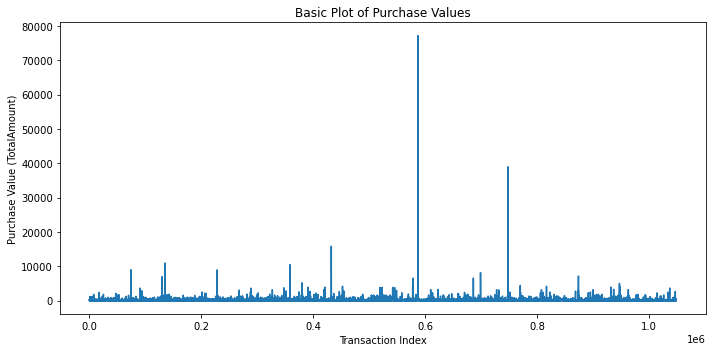

In [11]:
# Basic plot of purchase values

plt.figure(figsize=(10,5))
plt.plot(df['TotalAmount'])
plt.xlabel('Transaction Index')
plt.ylabel('Purchase Value (TotalAmount)')
plt.title('Basic Plot of Purchase Values')
plt.tight_layout()
plt.show()

## Customer Segmentation (RFM Analysis)
- **Recency**: How recent was the customer's last purchase?
- **Frequency**: How often do they buy?
- **Monetary**: How much do they spend?

In [12]:
# RFM computation
reference_date = df['InvoiceDate'].max()
reference_date
# Group by customer
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
    'Invoice': 'nunique',                                       # Frequency
    'TotalAmount': 'sum'                                        # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,40,7,5408.50
12348.0,76,5,2019.40
12349.0,19,4,4428.69
12350.0,311,1,334.40


## Data Visualization
- Frequency vs. Monetary
- Recency Distribution

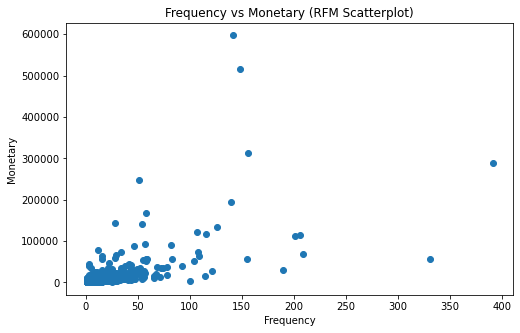

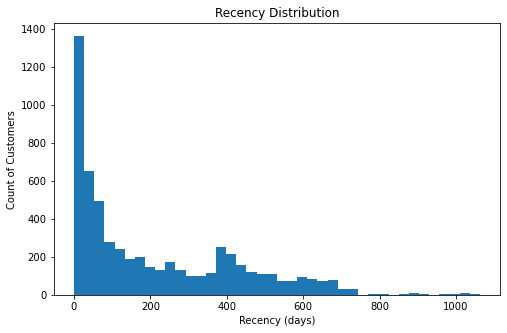

In [13]:
# Scatterplot for RFM
plt.figure(figsize=(8,5))
plt.scatter(rfm['Frequency'], rfm['Monetary'])
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Frequency vs Monetary (RFM Scatterplot)")
plt.show()

# Recency histogram
plt.figure(figsize=(8,5))
plt.hist(rfm['Recency'], bins=40)
plt.xlabel("Recency (days)")
plt.ylabel("Count of Customers")
plt.title("Recency Distribution")
plt.show()


## Conclusion
- Customers segmented using RFM.
- Insights can guide marketing efforts and retention strategies.